## Analysis of Building GHG Emissions and Derive predictive models.
In this notebook, we are working on a dataset to identify patterns of emission from buildings in Seattle, in relation to their energy consumption. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv('2016-building-energy-benchmarking.csv')
#df.head()
#df.columns

In [3]:
#df.describe()
#df.info()
#df.isnull().sum()
df.drop(['DataYear','PropertyName','Address','City','State','TaxParcelIdentificationNumber', 'PropertyGFAParking','ListOfAllPropertyUseTypes',
         'SecondLargestPropertyUseType','SecondLargestPropertyUseTypeGFA','ThirdLargestPropertyUseType','ThirdLargestPropertyUseTypeGFA',
        'Electricity(kWh)','NaturalGas(therms)','Comments','DefaultData','Outlier'],axis=1,inplace=True)

#Renaming our target column name to make it simple , hereon read GEI as GreenhouseEmissionsIntensity
df.rename(columns={'GHGEmissionsIntensity':'GEI'}, inplace=True)

'''temp1=df.nunique()
temp2=df.isnull().sum()
temp3=pd.concat([temp1,temp2], axis=1)
temp3.columns=['Unique Values','Null values']
print(temp3)
'''

"temp1=df.nunique()\ntemp2=df.isnull().sum()\ntemp3=pd.concat([temp1,temp2], axis=1)\ntemp3.columns=['Unique Values','Null values']\nprint(temp3)\n"

## Lets see how the buildings are having their primary property types.
<font color='red'> We will need to get a contingency table / cross table that depicts the distribution with color scaling</font>

In [4]:
#df.BuildingType.unique
#pd.crosstab(df.BuildingType, df.PrimaryPropertyType)

In [5]:
#pd.crosstab(df.BuildingType, df.CouncilDistrictCode)
#pd.crosstab(df.ZipCode, df.YearBuilt).max()


### Greenhouse gas emissions intensity according to District, Building Type, Year Built and (Largest) property use type

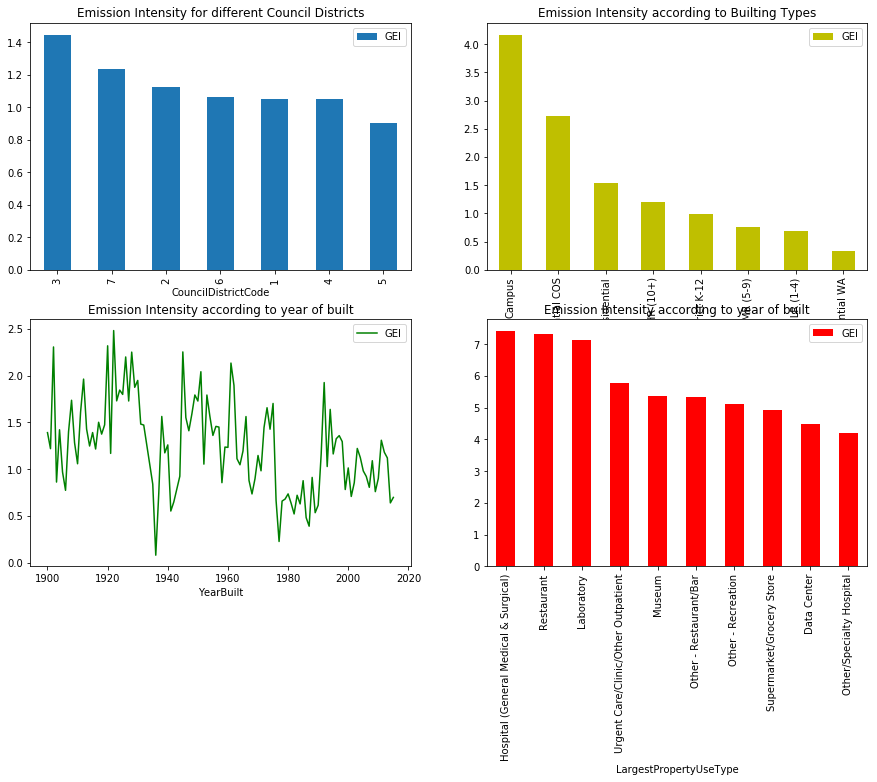

In [6]:
plt.figure(figsize=(15,10))

df.loc[:,['CouncilDistrictCode','GEI']].groupby('CouncilDistrictCode').mean().sort_values('GEI', ascending=False).plot(kind='bar',ax=plt.subplot(2,2,1),title='Emission Intensity for different Council Districts')

df.loc[:,['BuildingType','GEI']].groupby('BuildingType').mean().sort_values('GEI', ascending=False).plot(kind='bar',ax=plt.subplot(2,2,2), color='y', title='Emission Intensity according to Builting Types')
df.loc[:,['YearBuilt','GEI']].groupby('YearBuilt').mean().plot(kind='line',ax=plt.subplot(2,2,3), color='g', title='Emission Intensity according to year of built')
df.loc[:,['LargestPropertyUseType','GEI']].groupby('LargestPropertyUseType').mean().sort_values('GEI', ascending=False).head(10).plot(kind='bar',ax=plt.subplot(2,2,4), color='r', title='Emission Intensity according to year of built')

#grouped_by_year.head()
#plt.plot(grouped_by_year.YearBuilt, grouped_by_year.GHGEmissionsIntensity)

Few interpretations can be made from the above diagrams:
    1. Districts - 3,7,2 have high GEI, whereas district 5 has low GEI. Both the extremes will be analysed.
    2. Campus and Non-residential COS have high GEI. We will try to know why, and where are the loopholes.
    3. The greenhouse gas intensity of old buildings are high. New buildings fare better, the overall downtrend is visible, but we will need to explain the high fluctuations.
    4. Hospitals, Restaurants and Laboratories account for high Greenhouse gas emissions intensity.

## How numeric variables affect the Greenhouse gas emissions intensity? Lets mine..

### Check if there is any correlation of latitude and longitude with GHGEmissionIntensity

<font color='red'> We need to find correlation between the z scores or min-max-normalized values of two columns.
    that is not done at this point. Or I could not do it well. Need to change it at a later point. </font>

-0.04072669471575409
0.03936501248682341


<Figure size 720x360 with 0 Axes>

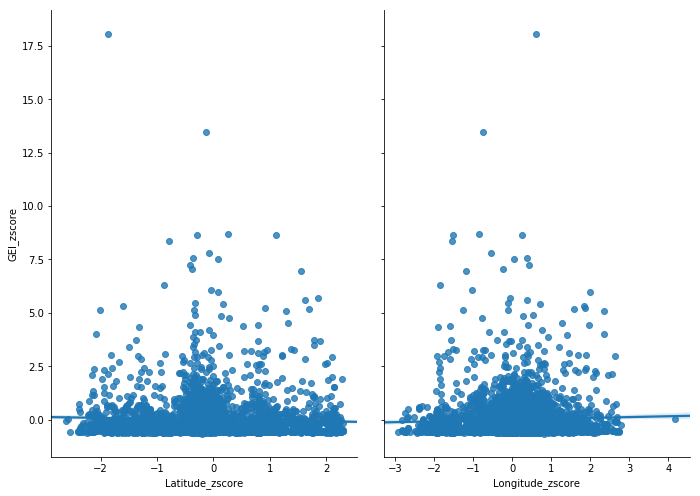

In [7]:
from scipy import stats
#print(df.Latitude.head())
#df['Latitude']=stats.zscore(df['Latitude'])
#print(df.Latitude.head())

print(df.Latitude.corr(df.GEI))
print(df.Longitude.corr(df.GEI))

df2=df.loc[:,['Latitude','Longitude','GEI']]
cols = list(df2.columns)

for col in cols:
    col_zscore = col + '_zscore'
    df2[col_zscore] = (df2[col] - df2[col].mean())/df2[col].std(ddof=0)
#print(df['Latitude'])

plt.figure(figsize=(10,5))
sns.pairplot(df2, x_vars=['Latitude_zscore','Longitude_zscore'], y_vars='GEI_zscore',size=7, aspect=0.7, kind='reg')

<Figure size 720x360 with 0 Axes>

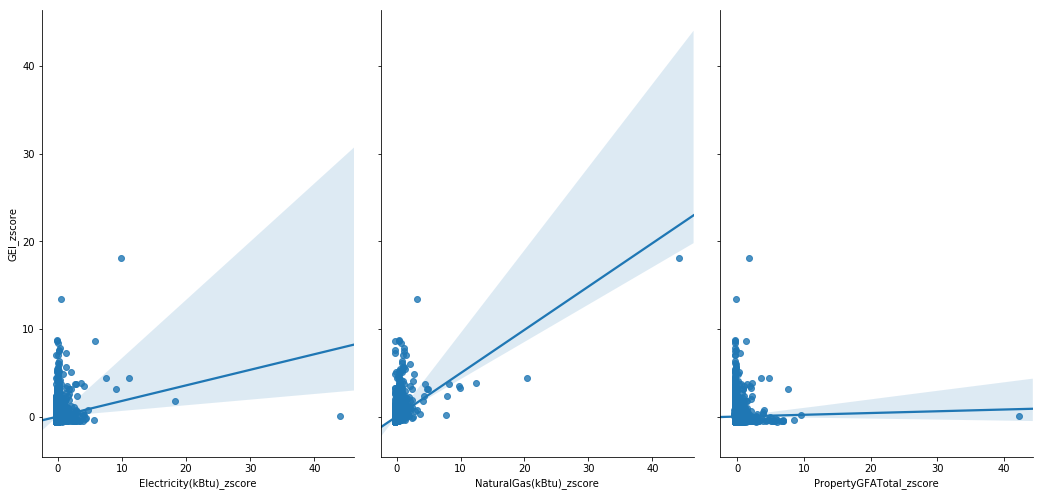

In [8]:
df3=df.loc[:,['Electricity(kBtu)','NaturalGas(kBtu)','PropertyGFATotal','GEI']]
#print(df2)
cols = list(df3.columns)


for col in cols:
    col_zscore = col + '_zscore'
    df3[col_zscore] = (df3[col] - df3[col].mean())/df3[col].std(ddof=0)

#print(df2)
plt.figure(figsize=(10,5))
sns.pairplot(df3, x_vars=['Electricity(kBtu)_zscore','NaturalGas(kBtu)_zscore','PropertyGFATotal_zscore'], y_vars='GEI_zscore',size=7, aspect=0.7, kind='reg')

It seems, there is no strong correlation latitude or longitude with GHGEmissionIntensity.

<Figure size 720x360 with 0 Axes>

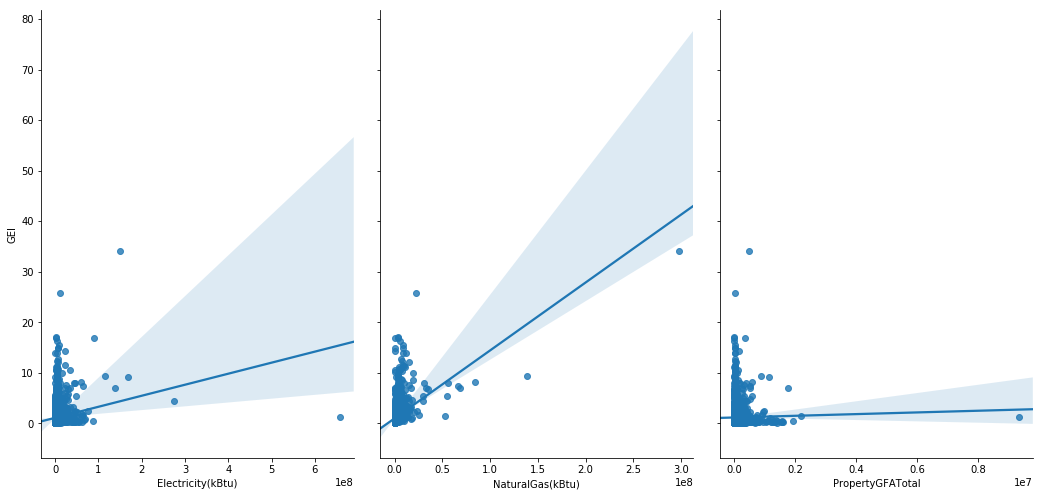

In [9]:
plt.figure(figsize=(10,5))
sns.pairplot(df, x_vars=['Electricity(kBtu)','NaturalGas(kBtu)','PropertyGFATotal'], y_vars='GEI',size=7, aspect=0.7, kind='reg')

Interpretation:

## In the following section, we are analyzing the total greenhouse gas emissions in relation to Electricity consumption, Natural gas consumption and Property gross floor area

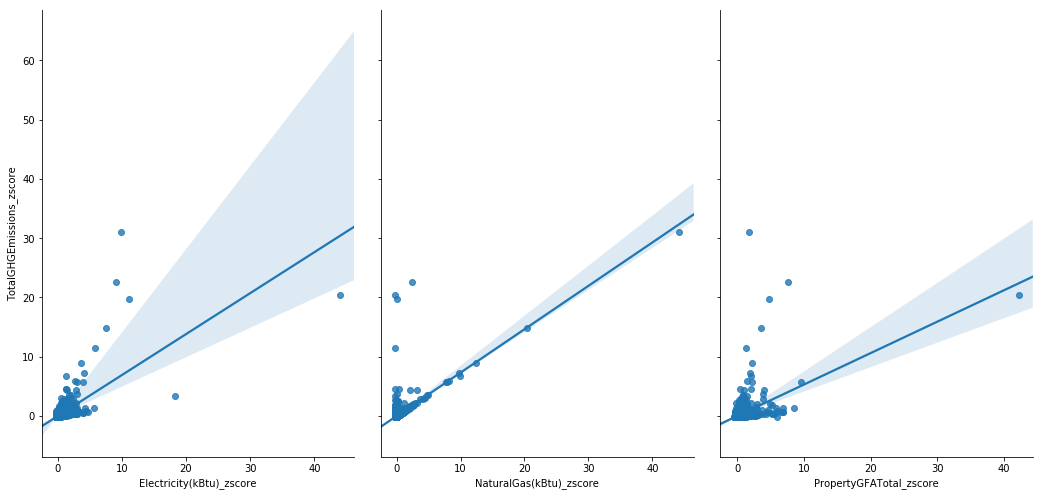

In [10]:
df4=df.loc[:,['Electricity(kBtu)','NaturalGas(kBtu)','PropertyGFATotal','TotalGHGEmissions']]
#print(df2)
cols = list(df4.columns)


for col in cols:
    col_zscore = col + '_zscore'
    df4[col_zscore] = (df4[col] - df4[col].mean())/df4[col].std(ddof=0)
    
sns.pairplot(df4, x_vars=['Electricity(kBtu)_zscore','NaturalGas(kBtu)_zscore','PropertyGFATotal_zscore'], y_vars='TotalGHGEmissions_zscore',size=7, aspect=0.7, kind='reg')
#sns.pairplot(df, x_vars=['Electricity(kBtu)','NaturalGas(kBtu)','PropertyGFATotal'], y_vars='TotalGHGEmissions',size=7, aspect=0.7, kind='reg')

Interpretation:

## Now, lets start linear regression to find out the value of GEI as function of combination of different variables.

we can see from an earlier analysis, that exactly 9 rows in each of the columns - Electricity(kBtu), NaturalGas(kBtu), and TotalGasEmissions have missing values. We are suspicious, if these columns have missing values for the same rows. Lets check.

In [11]:
df_test=df.loc[(df['Electricity(kBtu)'].isnull()) & (df['NaturalGas(kBtu)'].isnull()) & (df['TotalGHGEmissions'].isnull())]
df_test.shape

(9, 29)

Well, our suspicion has proven right. So, we will drop these rows.

In [12]:
print(df.shape)
df.dropna(subset=['Electricity(kBtu)'],inplace=True)
df.shape
#df['Electricity(kBtu)'].isna().sum()

(3376, 29)


(3367, 29)

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
linreg=LinearRegression()
X=df.loc[:, ['Electricity(kBtu)','NaturalGas(kBtu)','PropertyGFATotal']]
y=df.loc[:,'TotalGHGEmissions']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

linreg.fit(X_train, y_train)
y_test.sort_values().tail()

print(linreg.coef_, linreg.intercept_)

(2020, 3) (1347, 3) (2020,) (1347,)
[ 2.99195778e-05  4.39802492e-05 -7.34774658e-04] 23.313716464959725


In [14]:
y_pred=linreg.predict(X_test)
y_pred.shape

(1347,)

In [15]:
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

314.80733305082936


In [16]:
from sklearn.model_selection import cross_val_score
lm=LinearRegression()
score=cross_val_score(lm, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
print('RMSE error values are:\n', np.sqrt(-score))

RMSE error values are:
 [149.19400819 122.85252295 517.57622229 193.04880297  79.16386346
 140.02751595  88.50536161 660.60619527 345.03512004  63.89413254]


## Trying out MinMax Scaler

#### Just some simple experiment before we go ahead.

In [17]:
from sklearn.preprocessing import MinMaxScaler
s=pd.DataFrame([[12, 5, 34, 24],[20,10,20,10],[15,13,6,7]], columns=['a','b','c','d'])
s
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(s)
print(s)
print(x_scaled)

    a   b   c   d
0  12   5  34  24
1  20  10  20  10
2  15  13   6   7
[[0.         0.         1.         1.        ]
 [1.         0.625      0.5        0.17647059]
 [0.375      1.         0.         0.        ]]


In [18]:
plt.figure(figsize=(10,5))
x_scaled = min_max_scaler.fit_transform(df.loc[:,'Electricity(kBtu)','NaturalGas(kBtu)','PropertyGFATotal'])
print(x_scaled)
#sns.pairplot(df, x_vars=['Electricity(kBtu)','NaturalGas(kBtu)','PropertyGFATotal'], y_vars='GEI',size=7, aspect=0.7, kind='reg')

IndexingError: Too many indexers

<Figure size 720x360 with 0 Axes>